In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Soultion of C(k) in the complex domain

In [2]:
def Characteristic(k1,k2,g,gamma,deltax):
    k=complex(k1,k2)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    real= out.real
    img= out.imag
    return real,img

## Plot of C(k) for given g,$\gamma$ and $\Delta x$

In [3]:
g=2
gamma=0.5
deltax=-0.52
k1s=linspace(-10,10,500)
k2s=linspace(-10,10,500)
X,Y=meshgrid(k1s,k2s)
Zr=np.zeros((len(k1s),len(k2s)))
Zi=np.zeros((len(k1s),len(k2s)))
for i in range(len(k1s)):
    for j in range(len(k2s)):
        k1=k1s[i]
        k2=k2s[j]
        Zr[i][j]=Characteristic(k1,k2,g,gamma,deltax)[0]
        Zi[i][j]=Characteristic(k1,k2,g,gamma,deltax)[1]

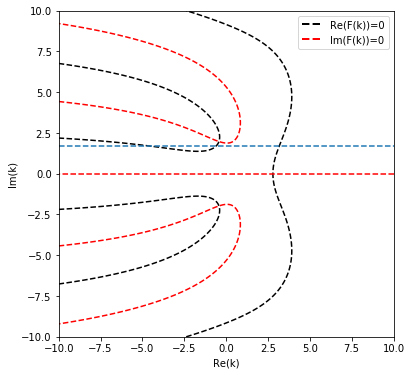

In [4]:
figure(figsize=(6,6))
CS1=plt.contour(X, Y,Zr.T,levels=[0],colors="k",linestyles="--")
#plt.clabel(CS1, inline=1,label="Re(F(k))",fontsize=10)
CS2=plt.contour(X, Y,Zi.T,levels=[0],colors="r",linestyles="--")
#plt.clabel(CS2, inline=1, fontsize=10)
axhline(y=1.7, linestyle="--")
#axvline(x=0, linestyle="--")
xlabel("Re(k)")
ylabel("Im(k)")


colors = ['black', 'red']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Re(F(k))=0', 'Im(F(k))=0']
plt.legend(lines, labels)
plt.show()


## Automatic solver

In [5]:
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import brute

In [8]:
# Finds the imaginary part of the pure immaginary solution for gamma=0
#Real part zero on imaginary axis
g=2
gamma=0
deltax=0

def Projection1(k,g,gamma,deltax):
    k=complex(0,k)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    real= out.real
    return real

FixedSparsity=fsolve(Projection1,1,args=(g,gamma,deltax))

#projected on the axis img=fixed sparsity
def RealProjection2(k,FixedImg,g,gamma,deltax):
    k=complex(k,FixedImg)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    real= out.real
    return real

def ImgProjection2(k,FixedImg,g,gamma,deltax):
    k=complex(k,FixedImg)
    out=pow(k,2)*exp(k*deltax)-2*g*gamma*k+2*g-exp(k*deltax)
    img= out.imag
    return img

def ObjectiveFunc(x,FixedImg,g,gamma):
    kr=x[0]
    deltax=x[1]
    return pow(ImgProjection2(kr,FixedImg,g,gamma,deltax),2)+pow(RealProjection2(kr,FixedImg,g,gamma,deltax),2)

In [9]:
g=2
FixedSparsity=fsolve(Projection1,1,args=(g,0,0))
gammas=logspace(-5,5,30)

krs=[]
deltaxs=[]

for i in range(len(gammas)):
    gamma=gammas[i]
    min_params=brute(ObjectiveFunc,ranges=[(-10,0),(-2,0)],args=(FixedSparsity,g,gamma))


    krs.append(min_params[0])
    deltaxs.append(min_params[1])

## $\Delta x (\gamma)$

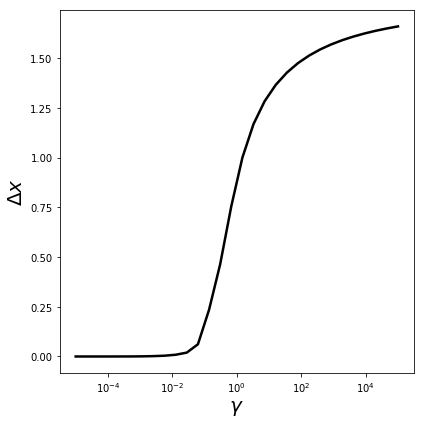

In [10]:
figure(figsize=(6,6))
plot(gammas,abs(asarray(deltaxs)),c="k",linestyle="-",linewidth=2.5)
ylabel(r"$\Delta x$", fontsize=20)
xlabel(r"$\gamma$", fontsize=20)
xscale("log")
tight_layout()
#savefig("figure3_a.svg")

## $|x_{max}|(\gamma)$

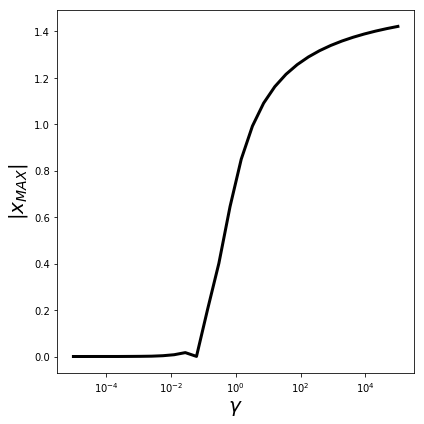

In [25]:
figure(figsize=(6,6))
plot(gammas,arctan(abs(asarray(krs))),c="k",linestyle="-",linewidth=3)
xscale("log")
ylabel(r"$|x_{MAX}|$", fontsize=20)
xlabel(r"$\gamma$", fontsize=20)
tight_layout()
#savefig("figure3_b.svg")

## Examples of solutions

Text(0,0.5,'V(x)')

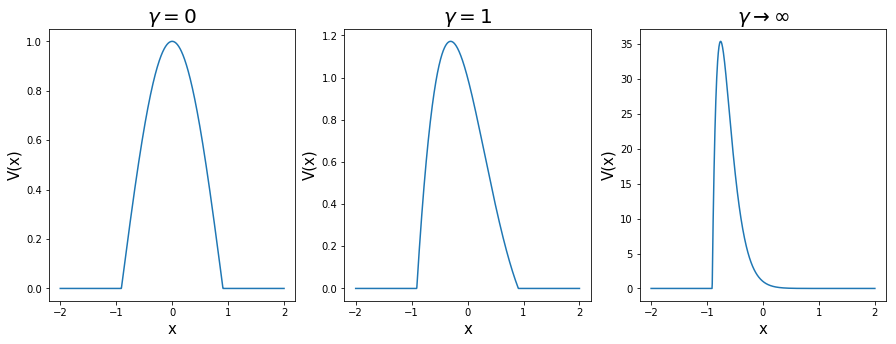

In [57]:
def ComplexV(x,a,b):
    return exp(a*x)*cos(b*x)

def ComplexV1(x,a,b):
    out=exp(a*x)*cos(b*x)
    if out>0:
        return out
    else:
        return 0
    
figure=figsize(15,5)

subplot(1,3,1)

a=0
b=1.73

x=linspace(-2,2,1000)
y=[]
for i in x:
    y.append(ComplexV1(i,a,b,))

plot(x,y)
#ylim(-0.01,1.1)
title(r"$\gamma=0$",fontsize=20)
xlabel("x",fontsize=15)
ylabel("V(x)",fontsize=15)

subplot(1,3,2)

a=-1
b=1.73

x=linspace(-2,2,1000)
y=[]
for i in x:
    y.append(ComplexV1(i,a,b,))

plot(x,y)
#ylim(-0.01,1.1)
title(r"$\gamma=1$",fontsize=20)
xlabel("x",fontsize=15)
ylabel("V(x)",fontsize=15)

subplot(1,3,3)

a=-6.5
b=1.73

x=linspace(-2,2,1000)
y=[]
for i in x:
    y.append(ComplexV1(i,a,b,))

plot(x,y)
#ylim(-0.01,1.1)
title(r"$\gamma \rightarrow \infty$",fontsize=20)
xlabel("x",fontsize=15)
ylabel("V(x)",fontsize=15)
    

## Examples with corresponding complex solultions

In [9]:
g=2
gamma=0
deltax=0
k1s=linspace(-10,10,500)
k2s=linspace(-5,5,500)
X,Y=meshgrid(k1s,k2s)
Zr=np.zeros((len(k1s),len(k2s)))
Zi=np.zeros((len(k1s),len(k2s)))
for i in range(len(k1s)):
    for j in range(len(k2s)):
        k1=k1s[i]
        k2=k2s[j]
        Zr[i][j]=Characteristic(k1,k2,g,gamma,deltax)[0]
        Zi[i][j]=Characteristic(k1,k2,g,gamma,deltax)[1]

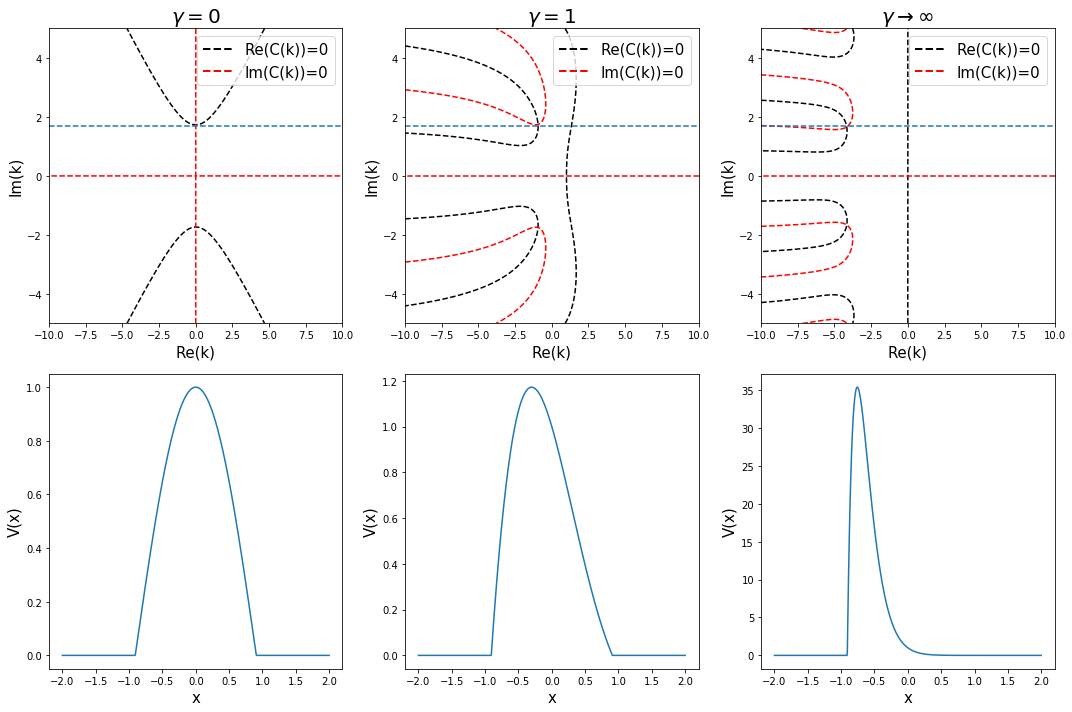

In [29]:
figure(figsize=(15,10))


subplot(2,3,1)

g=2
gamma=0
deltax=0
k1s=linspace(-10,10,500)
k2s=linspace(-5,5,500)
X,Y=meshgrid(k1s,k2s)
Zr=np.zeros((len(k1s),len(k2s)))
Zi=np.zeros((len(k1s),len(k2s)))
for i in range(len(k1s)):
    for j in range(len(k2s)):
        k1=k1s[i]
        k2=k2s[j]
        Zr[i][j]=Characteristic(k1,k2,g,gamma,deltax)[0]
        Zi[i][j]=Characteristic(k1,k2,g,gamma,deltax)[1]


CS1=plt.contour(X, Y,Zr.T,levels=[0],colors="k",linestyles="--")
#plt.clabel(CS1, inline=1,label="Re(F(k))",fontsize=10)
CS2=plt.contour(X, Y,Zi.T,levels=[0],colors="r",linestyles="--")
#plt.clabel(CS2, inline=1, fontsize=10)
axhline(y=1.7, linestyle="--")
#axvline(x=0, linestyle="--")
xlabel("Re(k)",fontsize=15)
ylabel("Im(k)",fontsize=15)
title(r"$\gamma=0$",fontsize=20)


colors = ['black', 'red']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Re(C(k))=0', 'Im(C(k))=0']
plt.legend(lines, labels,fontsize=15)


subplot(2,3,2)

g=2
gamma=1
deltax=-0.88
k1s=linspace(-10,10,500)
k2s=linspace(-5,5,500)
X,Y=meshgrid(k1s,k2s)
Zr=np.zeros((len(k1s),len(k2s)))
Zi=np.zeros((len(k1s),len(k2s)))
for i in range(len(k1s)):
    for j in range(len(k2s)):
        k1=k1s[i]
        k2=k2s[j]
        Zr[i][j]=Characteristic(k1,k2,g,gamma,deltax)[0]
        Zi[i][j]=Characteristic(k1,k2,g,gamma,deltax)[1]


CS1=plt.contour(X, Y,Zr.T,levels=[0],colors="k",linestyles="--")
#plt.clabel(CS1, inline=1,label="Re(F(k))",fontsize=10)
CS2=plt.contour(X, Y,Zi.T,levels=[0],colors="r",linestyles="--")
#plt.clabel(CS2, inline=1, fontsize=10)
axhline(y=1.7, linestyle="--")
#axvline(x=0, linestyle="--")
xlabel("Re(k)",fontsize=15)
ylabel("Im(k)",fontsize=15)
title(r"$\gamma=1$",fontsize=20)

colors = ['black', 'red']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Re(C(k))=0', 'Im(C(k))=0']
plt.legend(lines, labels,fontsize=15)


subplot(2,3,3)

g=2
gamma=1000
deltax=-1.64
k1s=linspace(-10,10,500)
k2s=linspace(-5,5,500)
X,Y=meshgrid(k1s,k2s)
Zr=np.zeros((len(k1s),len(k2s)))
Zi=np.zeros((len(k1s),len(k2s)))
for i in range(len(k1s)):
    for j in range(len(k2s)):
        k1=k1s[i]
        k2=k2s[j]
        Zr[i][j]=Characteristic(k1,k2,g,gamma,deltax)[0]
        Zi[i][j]=Characteristic(k1,k2,g,gamma,deltax)[1]


CS1=plt.contour(X, Y,Zr.T,levels=[0],colors="k",linestyles="--")
#plt.clabel(CS1, inline=1,label="Re(F(k))",fontsize=10)
CS2=plt.contour(X, Y,Zi.T,levels=[0],colors="r",linestyles="--")
#plt.clabel(CS2, inline=1, fontsize=10)
axhline(y=1.7, linestyle="--")
#axvline(x=0, linestyle="--")
xlabel("Re(k)",fontsize=15)
ylabel("Im(k)",fontsize=15)
title(r"$\gamma \rightarrow \infty$",fontsize=20)


colors = ['black', 'red']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Re(C(k))=0', 'Im(C(k))=0']
plt.legend(lines, labels,fontsize=15)



def ComplexV(x,a,b):
    return exp(a*x)*cos(b*x)

def ComplexV1(x,a,b):
    out=exp(a*x)*cos(b*x)
    if out>0:
        return out
    else:
        return 0
    


subplot(2,3,4)

a=0
b=1.73

x=linspace(-2,2,1000)
y=[]
for i in x:
    y.append(ComplexV1(i,a,b,))

plot(x,y)
#ylim(-0.01,1.1)
xlabel("x",fontsize=15)
ylabel("V(x)",fontsize=15)

subplot(2,3,5)

a=-1
b=1.73

x=linspace(-2,2,1000)
y=[]
for i in x:
    y.append(ComplexV1(i,a,b,))

plot(x,y)
#ylim(-0.01,1.1)
xlabel("x",fontsize=15)
ylabel("V(x)",fontsize=15)

subplot(2,3,6)

a=-6.5
b=1.73

x=linspace(-2,2,1000)
y=[]
for i in x:
    y.append(ComplexV1(i,a,b,))

plot(x,y)
#ylim(-0.01,1.1)

xlabel("x",fontsize=15)
ylabel("V(x)",fontsize=15)

tight_layout()
savefig("figure2.svg")
